In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
migration_population=pd.read_csv('3_migration_population_merge_clean.csv')
migration_net=pd.read_csv('2_migration_merge_clean.csv')

FileNotFoundError: [Errno 2] File 3_migration_population_merge_clean.csv does not exist: '3_migration_population_merge_clean.csv'

In [ ]:
migration_population_transpose=migration_population.T

In [ ]:
migration_net_net=migration_net[[
                    'Country Name', 'Net Migration 1962', 'Net Migration 1967', 'Net Migration 1972',
                    'Net Migration 1977', 'Net Migration 1982', 'Net Migration 1987',
                    'Net Migration 1992', 'Net Migration 1997', 'Net Migration 2002', 'Net Migration 2007',
                    'Net Migration 2012', 'Net Migration 2017']]

In [ ]:
migration_net.columns

In [ ]:
migration_net_rate=migration_net[['Country Name','MigrRatePopn1962','MigrRatePopn1967','MigrRatePopn1972',
                                  'MigrRatePopn1977','MigrRatePopn1982','MigrRatePopn1987',
                                  'MigrRatePopn1992', 'MigrRatePopn1997', 'MigrRatePopn2002',
                                  'MigrRatePopn2007', 'MigrRatePopn2012','MigrRatePopn2017']]

# Top 10 for inmigration  (absolute value)

In [ ]:
migration_net_net[(migration_net['Region'].isnull()==False)].nlargest(10,'Net Migration 2017')

In [ ]:
migration_net_to_plot=migration_net_net[(migration_net['Region'].isnull()==False)].nlargest(10,'Net Migration 2017').T


# Top 10 for inmigration (rate)

In [ ]:
migration_net_rate[(migration_net['Region'].isnull()==False)].nlargest(10,'MigrRatePopn2017')

# Top 10 for emmigration (absolute value)

In [ ]:
migration_net_net[(migration_net['Region'].isnull()==False)].nsmallest(10,'Net Migration 2017')

# Top 10 for emmigration ( by rate)

In [ ]:
migration_net_rate[(migration_net['Region'].isnull()==False)].nsmallest(10,'MigrRatePopn2017')

In [ ]:
mig_pop_2017=migration_population[['Country Name','Net Migration 2017', 'Population 2017']]

In [ ]:
migration_net.loc[(migration_net['Net Migration 2017']
                    >= 5000) & (migration_net['Region'].isnull()==False)].sort_values(
                    by = 'Net Migration 2017', ascending = False)[[
                    'Country Name', 'Net Migration 1962', 'Net Migration 1967', 'Net Migration 1972',
                    'Net Migration 1977', 'Net Migration 1982', 'Net Migration 1987',
                    'Net Migration 1992', 'Net Migration 1997', 'Net Migration 2002', 'Net Migration 2007',
                    'Net Migration 2012', 'Net Migration 2017']].head(20)

# Creating Pivot Table for Time plottings 

In [ ]:
migration_net_to_plot=migration_net_net[(migration_net['Region'].isnull()==False)].nlargest(10,'Net Migration 2017').T

In [ ]:
migration_net_to_plot

In [ ]:
index=[pd.date_range(start='1962', periods=12, freq='5Y')]
index

In [ ]:
migration_net_to_plot.columns

In [ ]:
new_header = migration_net_to_plot.iloc[0] #grab the first row for the header
migration_net_to_plot = migration_net_to_plot[1:] #take the data less the header row
migration_net_to_plot.columns = new_header #set the header row as the df header

In [ ]:
migration_net_to_plot.columns

In [ ]:
migration_net_to_plot=migration_net_to_plot.set_index(index).copy()

In [ ]:
migration_net_to_plot

In [ ]:
migration_net_to_plot.plot(kind='line',figsize=(15,8))
plt.title("Top 10 countries by net migration")
#plt.xlabel("Family Member")
#plt.ylabel("")

# OLS Models

We used different approaches to see what are the factors that affect the most the net migration. 

In [3]:
migration_happiness=pd.read_csv('4_migration_hapiness_merge.csv')

In [4]:
migration_happiness

,Unnamed: 0,Country Name,Country Code,Region,Income Group,Net Migration 1962,Population 1962,MigrRatePopn1962,Net Migration 1967,Population 1967,...,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,Aruba,ABW,Latin America & Caribbean,High income,-4323.0,56225.0,-0.076888,-4275.0,58055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,AFG,South Asia,Low income,-20000.0,9351441.0,-0.002139,-20000.0,10399926.0,...,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
2,2,Angola,AGO,Sub-Saharan Africa,Lower middle income,-296717.0,5608539.0,-0.052905,-587286.0,5774243.0,...,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
3,3,Albania,ALB,Europe & Central Asia,Upper middle income,-99.0,1711319.0,-0.000058,-99.0,1965598.0,...,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
4,4,Andorra,AND,Europe & Central Asia,High income,NaN,15370.0,NaN,NaN,20758.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,260,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,106550.0,17965725.0,0.005931,199359.0,20406864.0,...,4.829,4.929435,4.728565,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909
261,261,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,-35328.0,3260650.0,-0.010835,-22042.0,3797873.0,...,4.514,4.644106,4.383894,0.636407,1.003187,0.257836,0.461603,0.249580,0.078214,1.826705
262,262,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,-15009.0,4039201.0,-0.003716,-42001.0,4779827.0,...,3.875,3.978700,3.771300,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970
263,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.422,6.494596,6.349404,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607


In [5]:
migration_happiness_no_null=migration_happiness.copy().dropna()

In [6]:
migration_happiness_no_null

,Unnamed: 0,Country Name,Country Code,Region,Income Group,Net Migration 1962,Population 1962,MigrRatePopn1962,Net Migration 1967,Population 1967,...,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
1,1,Afghanistan,AFG,South Asia,Low income,-20000.0,9351441.0,-0.002139,-20000.0,10399926.0,...,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
2,2,Angola,AGO,Sub-Saharan Africa,Lower middle income,-296717.0,5608539.0,-0.052905,-587286.0,5774243.0,...,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
3,3,Albania,ALB,Europe & Central Asia,Upper middle income,-99.0,1711319.0,-0.000058,-99.0,1965598.0,...,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
6,6,United Arab Emirates,ARE,Middle East & North Africa,High income,37882.0,112118.0,0.337876,53823.0,169771.0,...,6.648,6.722047,6.573952,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704
7,7,Argentina,ARG,Latin America & Caribbean,Upper middle income,122000.0,21153052.0,0.005767,130000.0,22828869.0,...,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,Vietnam,VNM,East Asia & Pacific,Lower middle income,0.0,34683407.0,0.000000,0.0,40072948.0,...,5.074,5.147281,5.000719,0.788548,1.277491,0.652169,0.571056,0.234968,0.087633,1.462319
259,259,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,-100000.0,5473671.0,-0.018269,-245662.0,5907874.0,...,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601
260,260,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,106550.0,17965725.0,0.005931,199359.0,20406864.0,...,4.829,4.929435,4.728565,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909
261,261,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,-35328.0,3260650.0,-0.010835,-22042.0,3797873.0,...,4.514,4.644106,4.383894,0.636407,1.003187,0.257836,0.461603,0.249580,0.078214,1.826705


In [7]:
migration_happiness_no_null=migration_happiness_no_null.drop('Unnamed: 0', axis=1).copy()

In [8]:
migration_happiness_no_null.columns

Index(['Country Name', 'Country Code', 'Region', 'Income Group',
       'Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
       'Net Migration 2017', 'Population 2017', 'MigrRatePopn2017', 'Country',
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.'

# OLS for 'Net Migration 2017'

Here we used all the information contained in the tables to see which features are most likely to affect the migration. 

In [9]:
target_feature='Net Migration 2017'
predictors=['const','Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
        'Population 2017', 
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual']

In [10]:
import pandas as pd
import numpy as np
import uuid
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.base import TransformerMixin
from scipy import stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style("ticks")

In [11]:
migration_happiness_no_null_num = migration_happiness_no_null[list(migration_happiness_no_null._get_numeric_data().columns)].reset_index(drop=True)
migration_happiness_no_null_num.columns

Index(['Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
       'Net Migration 2017', 'Population 2017', 'MigrRatePopn2017',
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Tru

In [12]:
migration_happiness_no_null = sm.add_constant(migration_happiness_no_null)

In [13]:
y = migration_happiness_no_null_num[target_feature]
X = migration_happiness_no_null_num[ predictors]
lin_reg = sm.OLS(y, X).fit()

KeyError: "['const'] not in index"

In [14]:
lin_reg.summary()

NameError: name 'lin_reg' is not defined

As expected the coefficients values are affected by multicolinearity, for further analysis we'd like to inpect more in deepth how are they correlated and then improve the model by using only a minimun number of features that are no colinear. 

In [15]:
migration_happiness_no_null_num.corr()['Net Migration 2017'].to_frame()

,Net Migration 2017
Net Migration 1962,0.417488
Population 1962,-0.170793
MigrRatePopn1962,0.059804
Net Migration 1967,0.481968
Population 1967,-0.182536
MigrRatePopn1967,0.072761
Net Migration 1972,0.418565
Population 1972,-0.195988
MigrRatePopn1972,0.074268
Net Migration 1977,0.381985


# OLS for  MigrRatePopn2017 

We also wanted to check if the same factors used for the last model also affect the migration rate. 

In [ ]:
target_feature='MigrRatePopn2017'
predictors=['const','Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
        'Population 2017', 
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual']

In [ ]:
Y = migration_happiness_no_null_num[target_feature]
x = migration_happiness_no_null_num[ predictors]
lin_reg = sm.OLS(Y, x).fit()

In [ ]:
lin_reg.summary()

In [ ]:
migration_happiness_no_null_num.corr()['MigrRatePopn2017'].to_frame()

To avoid the multicolinearity we proceed with models using specific features that we considered more likely to affect the migration by themselves.

# OLS using Region and Income group

In [ ]:
migration_happiness_no_null

In [16]:
region_and_income=pd.get_dummies(migration_happiness_no_null[['Region', 'Income Group']])

In [17]:
migration_income= pd.concat([migration_happiness_no_null_num, region_and_income], axis=1, sort=False)

In [18]:
migration_income=migration_income.dropna().copy()

In [19]:
migration_income

,Net Migration 1962,Population 1962,MigrRatePopn1962,Net Migration 1967,Population 1967,MigrRatePopn1967,Net Migration 1972,Population 1972,MigrRatePopn1972,Net Migration 1977,...,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Income Group_High income,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income
1,-296717.0,5608539.0,-0.052905,-587286.0,5774243.0,-0.101708,199800.0,6248552.0,0.031975,199800.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-99.0,1711319.0,-0.000058,-99.0,1965598.0,-0.000050,-99.0,2243126.0,-0.000044,-99.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,37882.0,112118.0,0.337876,53823.0,169771.0,0.317033,260488.0,330974.0,0.787035,372430.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,384343.0,10742000.0,0.035779,806193.0,11799000.0,0.068327,259531.0,13177000.0,0.019696,235744.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,15996.0,7129864.0,0.002244,50401.0,7376998.0,0.006832,82001.0,7544201.0,0.010869,5502.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,-6000.0,2603882.0,-0.002304,-34000.0,2750086.0,-0.012363,-136000.0,2821461.0,-0.048202,-60000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
142,1835728.0,186538000.0,0.009841,1556054.0,198712000.0,0.007831,2889346.0,209896000.0,0.013766,3770881.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
145,0.0,34683407.0,0.000000,0.0,40072948.0,0.000000,0.0,45548479.0,0.000000,-858895.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
147,106550.0,17965725.0,0.005931,199359.0,20406864.0,0.009769,222659.0,23281508.0,0.009564,73316.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
average_migration= migration_income[['Net Migration 1967', 
       'Net Migration 1972', 
       'Net Migration 1977', 
       'Net Migration 1982', 
       'Net Migration 1987', 
       'Net Migration 1992', 
       'Net Migration 1997', 
       'Net Migration 2002', 
       'Net Migration 2007', 
       'Net Migration 2012', 
       'Net Migration 2017']].mean()

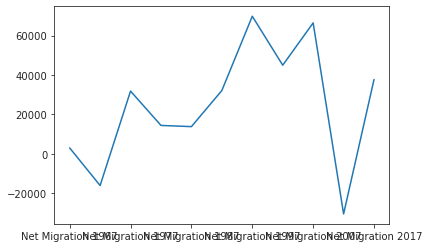

In [67]:
average_migration.plot()

In [50]:
#average_migration = average_migration.rename(columns = {'0': 'Average'}, inplace = True)


In [51]:
average_migration

,0
Net Migration 1967,2975.325581
Net Migration 1972,-16124.209302
Net Migration 1977,31841.465116
Net Migration 1982,14403.918605
Net Migration 1987,13791.325581
Net Migration 1992,32126.767442
Net Migration 1997,69860.941860
Net Migration 2002,44996.755814
Net Migration 2007,66482.279070
Net Migration 2012,-30548.709302


In [63]:
data = { 'data':[ migration_income[['Net Migration 1967', 
       'Net Migration 1972', 
       'Net Migration 1977', 
       'Net Migration 1982', 
       'Net Migration 1987', 
       'Net Migration 1992', 
       'Net Migration 1997', 
       'Net Migration 2002', 
       'Net Migration 2007', 
       'Net Migration 2012', 
       'Net Migration 2017']].mean()]} 
#'Years':[pd.date_range('1/1/1967', periods=11,  freq='5Y')],
df= pd.DataFrame(data, index=pd.date_range('1/1/1967', periods=11,  freq='5Y'))


In [64]:
df

,data
1967-12-31,Net Migration 1967 2975.325581 Net Migrati...
1972-12-31,Net Migration 1967 2975.325581 Net Migrati...
1977-12-31,Net Migration 1967 2975.325581 Net Migrati...
1982-12-31,Net Migration 1967 2975.325581 Net Migrati...
1987-12-31,Net Migration 1967 2975.325581 Net Migrati...
1992-12-31,Net Migration 1967 2975.325581 Net Migrati...
1997-12-31,Net Migration 1967 2975.325581 Net Migrati...
2002-12-31,Net Migration 1967 2975.325581 Net Migrati...
2007-12-31,Net Migration 1967 2975.325581 Net Migrati...
2012-12-31,Net Migration 1967 2975.325581 Net Migrati...


In [55]:
average_migration=average_migration.set_index(pd.date_range('1/1/1967', periods=11,  freq='5Y'))

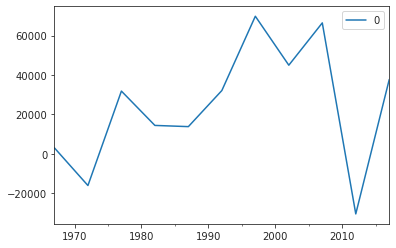

In [57]:
average_migration.plot().

In [ ]:
migration_income=sm.add_constant(migration_income)

In [ ]:
migration_income.columns

In [ ]:
predictors=['const', 'Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
        'Population 2017', 
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Latin America & Caribbean',
       'Region_Middle East & North Africa', 'Region_North America',
       'Region_South Asia', 'Region_Sub-Saharan Africa',
       'Income Group_High income', 'Income Group_Low income',
       'Income Group_Lower middle income', 'Income Group_Upper middle income']
target_feature='Net Migration 2017'

In [ ]:
Y = migration_income[target_feature]
x = migration_income[ predictors]
lin_reg = sm.OLS(Y, x).fit()

In [ ]:
lin_reg.summary()

In [ ]:
Net_2017_hat= lin_reg.predict()

In [ ]:
x=migration_income['Net Migration 2017']

In [ ]:
from statsmodels.graphics.api import abline_plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, ylabel='Observed Values', xlabel='Fitted Values')
ax.scatter(Net_2017_hat, x)
y_vs_yhat = sm.OLS(Net_2017_hat, sm.add_constant(Net_2017_hat, prepend=True)).fit()
fig = abline_plot(model_results=y_vs_yhat, ax=ax)

In [ ]:
migration_income.corr()['Net Migration 2017'].to_frame()

# OLS model  to predict net migration in 2017 using only the data from happines table from the same year

In [ ]:
predictors=['const', 
        'Happiness.Score', 
        'Health..Life.Expectancy.']
target_feature='Net Migration 2017'

In [ ]:
Y = migration_income[target_feature]
x = migration_income[ predictors]
lin_reg = sm.OLS(Y, x).fit()

In [ ]:
lin_reg.summary()

In [ ]:
Net_2017_hap= lin_reg.predict()

In [ ]:
x=migration_income['Net Migration 2017']

In [ ]:
from statsmodels.graphics.api import abline_plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, ylabel='change', xlabel='Fitted Values')
ax.scatter(Net_2017_hap, x)
y_vs_yhat = sm.OLS(Net_2017_hap, sm.add_constant(Net_2017_hap, prepend=True)).fit()
fig = abline_plot(model_results=y_vs_yhat, ax=ax)

# OLS using only income group of the countries 

In [ ]:
predictors=['const', 
       'Income Group_High income', 'Income Group_Low income',
       'Income Group_Lower middle income', 'Income Group_Upper middle income']
target_feature='Net Migration 2017'

In [ ]:
Y = migration_income[target_feature]
x = migration_income[ predictors]
lin_reg = sm.OLS(Y, x).fit()

In [ ]:
lin_reg.summary()

In [ ]:
Net_2017_inc= lin_reg.predict()

In [ ]:
x=migration_income['Net Migration 2017']

In [ ]:
from statsmodels.graphics.api import abline_plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, ylabel='change', xlabel='Fitted Values')
ax.scatter(Net_2017_inc, x)
y_vs_yhat = sm.OLS(Net_2017_inc, sm.add_constant(Net_2017_inc, prepend=True)).fit()
fig = abline_plot(model_results=y_vs_yhat, ax=ax)